<a href="https://colab.research.google.com/github/nrubio6131/nico_CIS/blob/master/trabajos_CIS/Clase4_Decision_tree_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision tree
* maxdept (para evitar sobre ajuste)


In [1]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [2]:
#importamos los datos
# load_boston()
dfx = pd.DataFrame(load_boston().data, columns=(load_boston()).feature_names)
dfy = pd.DataFrame(load_boston().target)
dfy

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [3]:
#Organizamos los datos
X=dfx.iloc[:,-1]
X = X[:, np.newaxis]
Y= dfy.iloc[:,0]
Y = Y[:, np.newaxis]
print("Dimensiones en X: {}".format(str(X.shape)))
print("Dimension en Y: {}".format(str(Y.shape)))

Dimensiones en X: (506, 1)
Dimension en Y: (506, 1)


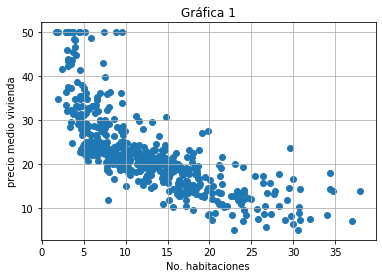

In [4]:
plt.scatter(X,Y)
plt.title("Gráfica 1")
plt.xlabel("No. habitaciones")
plt.ylabel("precio medio vivienda")
plt.grid()
plt.show()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3, random_state=4)

In [6]:
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

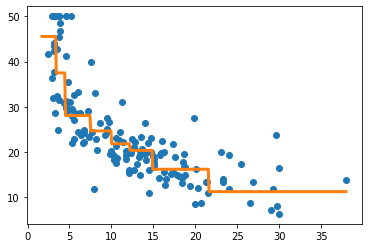

In [7]:
#Graficamos los datos de prueba junto con la predicción
X_grafica = np.arange(min(X), max(X), 0.1)
X_grafica = X_grafica.reshape((len(X_grafica), 1))
plt.scatter(X_test, Y_test)

plt.plot(X_grafica, decision_tree.predict(X_grafica), color='#ff7f0e', linewidth=3)
plt.show()

In [8]:
Y_pred= decision_tree.predict(X_test)
print('resultado del entrenamiento = {}'.format(decision_tree.score(X_train,Y_train)))
print('resultado con los datos de prueba = {}'.format(decision_tree.score(X_test,Y_test)))

resultado del entrenamiento = 0.6802651142679594
resultado con los datos de prueba = 0.6816357411462317


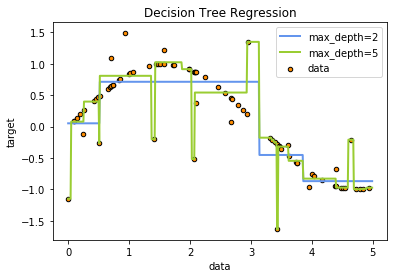

In [9]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()